**STC 510 Module 3**

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import PHX crime data
crime = pd.read_csv(r"C:\Users\tonya\Downloads\crime-data_crime-data_crimestat.csv", engine = 'python')

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527580 entries, 0 to 527579
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC NUMBER          527580 non-null  object 
 1   OCCURRED ON         527161 non-null  object 
 2   OCCURRED TO         339743 non-null  object 
 3   UCR CRIME CATEGORY  527580 non-null  object 
 4   100 BLOCK ADDR      527580 non-null  object 
 5   ZIP                 527574 non-null  float64
 6   PREMISE TYPE        524070 non-null  object 
 7   GRID                526141 non-null  object 
dtypes: float64(1), object(7)
memory usage: 32.2+ MB


In [4]:
crime.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,BD30
1,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,BJ30
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT,BI30
3,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE,AF12
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,DA19


In [5]:
crime.nunique()

INC NUMBER            527575
OCCURRED ON           335250
OCCURRED TO           247634
UCR CRIME CATEGORY         9
100 BLOCK ADDR         48170
ZIP                      117
PREMISE TYPE              98
GRID                    1783
dtype: int64

In [6]:
crime['UCR CRIME CATEGORY'].value_counts()

LARCENY-THEFT                            268448
BURGLARY                                  67660
MOTOR VEHICLE THEFT                       60444
DRUG OFFENSE                              48043
AGGRAVATED ASSAULT                        47858
ROBBERY                                   20752
RAPE                                       8139
ARSON                                      4877
MURDER AND NON-NEGLIGENT MANSLAUGHTER      1359
Name: UCR CRIME CATEGORY, dtype: int64

<AxesSubplot:>

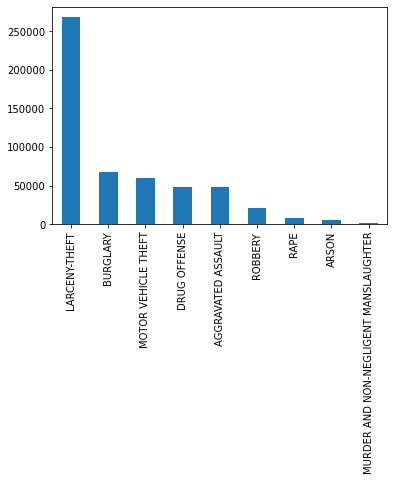

In [7]:
crime['UCR CRIME CATEGORY'].value_counts().plot.bar()

As we can see above, the most common crime reported in this dataset is larceny-theft, which occured almost 4x the amount of the 2nd most common crime, which is burglary.

Since larceny-theft is the most common crime reported, let's see where the most reported instances of this crime occurs.

In [8]:
crime[crime['UCR CRIME CATEGORY'] == 'LARCENY-THEFT'].ZIP.value_counts()

85015.0    13618
85008.0    12907
85051.0    11833
85041.0    11401
85035.0     9907
           ...  
85284.0        1
85351.0        1
85286.0        1
85268.0        1
85383.0        1
Name: ZIP, Length: 97, dtype: int64

Larceny-theft crimes were reported most in the 85015 zip code, with 13618 instances of this crime beng reported. This zip code belongs to the Alhambra neighborhood in central Phoenix (https://www.unitedstateszipcodes.org/85015/).

Using this information, it could be useful to see what kind of premises that crime may be most likley to occur in the Alhambra neighborhood and see how that compares to the entire dataset's different premise types.

In [9]:
larceny = crime[crime['UCR CRIME CATEGORY'] == 'LARCENY-THEFT']
larceny['PREMISE TYPE'].value_counts()

APARTMENT                      25920
SINGLE FAMILY HOUSE            25185
PARKING LOT                    23615
DEPARTMENT / DISCOUNT STORE    22247
RETAIL BUSINESS                21620
                               ...  
RAIL STOP                          7
REST AREA                          7
LAKE / WATERWAY / BEACH            3
MILITARY INSTALLATION              3
TRIBAL LANDS                       2
Name: PREMISE TYPE, Length: 98, dtype: int64

In [10]:
alhambra = larceny[larceny['ZIP'] == 85015]
alhambra['PREMISE TYPE'].value_counts()

DEPARTMENT / DISCOUNT STORE          2358
RETAIL BUSINESS                      2104
APARTMENT                            1701
PARKING LOT                          1185
SINGLE FAMILY HOUSE                   671
                                     ... 
SCHOOL-OTHER                            1
AMUSEMENT PARK                          1
DOCK/WHARF/FREIGHT/MODAL TERMINAL       1
TRAIN STATION                           1
INDUSTRIAL SITE                         1
Name: PREMISE TYPE, Length: 85, dtype: int64

As we can see by the numbers, larceny-theft happens most in apartment buildings throughout the entire datatset. However, as we can see in the second output that has shows the premise type for larceny-theft that occurs in the 85015 zip code, this type of crime occured most at a department or discount store, with the Alhambra neighborhood's apartments coming in 3rd.

Now, let's group the crimes from this dataset into 2 categories: non-violent and violent crime. The non-violent crimes that appear on this dataset are larceny-theft, burglary, motor vehicle theft, and drug offense. The violent crimes, then, are aggrevated assault, robbery, rape, arson, and murder and non-negligent manslaughter.

In [11]:
#this can be done by creating new dataframes and appending them using the append function, as shown below
larceny = crime[crime['UCR CRIME CATEGORY'] == 'LARCENY-THEFT']
burglary = crime[crime['UCR CRIME CATEGORY'] == 'BURGLARY']
motor = crime[crime['UCR CRIME CATEGORY'] == 'MOTOR VEHICLE THEFT']
drug = crime[crime['UCR CRIME CATEGORY'] == 'DRUG OFFENSE']

nonviolent = larceny.append([burglary, motor, drug])

In [12]:
assault = crime[crime['UCR CRIME CATEGORY'] == 'AGGREVATED ASSAULT']
robbery = crime[crime['UCR CRIME CATEGORY'] == 'ROBBERY']
arson = crime[crime['UCR CRIME CATEGORY'] == 'ARSON']
mnms = crime[crime['UCR CRIME CATEGORY'] == 'MURDER AND NON-NEGLIGENT MANSLAUGHTER']

violent = assault.append([robbery, arson, mnms])

In [13]:
nonviolent.shape

(444595, 8)

In [14]:
violent.shape

(26988, 8)

Simply finding the shape of both of the new dataframes will indicate that, in this dataset, 444595 nonviolent crimes were reported and 26988 violent crimes were reported. Within the alloted period, nonviolent crimes occured and were reported nearly 17x that of violent crime.

Phoenix authorities would be able to use the info found in this script and do more analyses to inform residents of certain areas to be more aware of suspicious activity and to keep important possessions as hidden as possible. Police could also use this information to decide where to place more officers, how often they should go on a routine through certain areas, and to be on the look out for certain crimes in certain areas. Of course, due to the nature of many of these crimes, they can't all be prevented, but actions can be taken so that the citizens of Phoenix are able to live a safe, happy, and healthy life.